# Import Library

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [10]:
model = Sequential()

In [11]:
#卷積層1

In [12]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [13]:
model.add(Dropout(rate=0.25))

In [14]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [15]:
#卷積層2與池化層2

In [16]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [17]:
model.add(Dropout(0.25))

In [18]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [19]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [20]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [21]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [22]:
model.add(Dense(10, activation='softmax'))

In [23]:
#檢查model 的STACK
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

# 載入之前訓練的模型

In [24]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

# 作業: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate

In [25]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [27]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)          

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 137s 3ms/sample - loss: 2.1892 - accuracy: 0.1894 - val_loss: 2.0716 - val_accuracy: 0.3009
Epoch 2/10
40000/40000 [==============================] - 118s 3ms/sample - loss: 1.9609 - accuracy: 0.2955 - val_loss: 1.9579 - val_accuracy: 0.3482
Epoch 3/10
40000/40000 [==============================] - 133s 3ms/sample - loss: 1.8471 - accuracy: 0.3462 - val_loss: 1.8617 - val_accuracy: 0.3888
Epoch 4/10
40000/40000 [==============================] - 128s 3ms/sample - loss: 1.7444 - accuracy: 0.3828 - val_loss: 1.7583 - val_accuracy: 0.4118
Epoch 5/10
40000/40000 [==============================] - 114s 3ms/sample - loss: 1.6621 - accuracy: 0.4052 - val_loss: 1.6889 - val_accuracy: 0.4389
Epoch 6/10
40000/40000 [==============================] - 136s 3ms/sample - loss: 1.5993 - accuracy: 0.4276 - val_loss: 1.6310 - val_accuracy: 0.4579
Epoch 7/10
40000/40000 [==========================

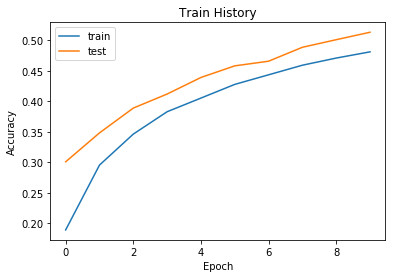

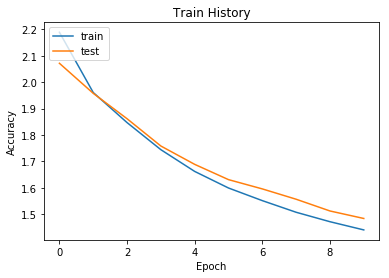

In [30]:
show_train_history('accuracy','val_accuracy')
show_train_history('loss','val_loss')

In [31]:
def build_model():
    model = Sequential()
    model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
    model.add(Dropout(rate=0.25))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
    model.add(Dropout(0.25))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(rate=0.25))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(rate=0.25))
    model.add(Dense(10, activation='softmax'))
    print(model.summary())
    
    return model

In [32]:
model = build_model()
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [33]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)          

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 121s 3ms/sample - loss: 0.0909 - accuracy: 0.0967 - val_loss: 0.0900 - val_accuracy: 0.1023
Epoch 2/10
40000/40000 [==============================] - 111s 3ms/sample - loss: 0.0905 - accuracy: 0.1011 - val_loss: 0.0899 - val_accuracy: 0.1093
Epoch 3/10
40000/40000 [==============================] - 112s 3ms/sample - loss: 0.0903 - accuracy: 0.1072 - val_loss: 0.0898 - val_accuracy: 0.1219
Epoch 4/10
40000/40000 [==============================] - 113s 3ms/sample - loss: 0.0901 - accuracy: 0.1138 - val_loss: 0.0898 - val_accuracy: 0.1358
Epoch 5/10
40000/40000 [==============================] - 113s 3ms/sample - loss: 0.0900 - accuracy: 0.1170 - val_loss: 0.0897 - val_accuracy: 0.1535
Epoch 6/10
40000/40000 [==============================] - 109s 3ms/sample - loss: 0.0898 - accuracy: 0.1245 - val_loss: 0.0896 - val_accuracy: 0.1660
Epoch 7/10
40000/40000 [==========================

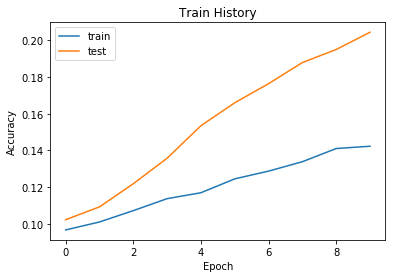

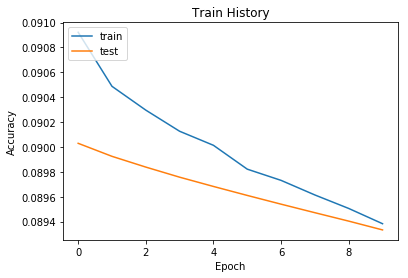

In [34]:
show_train_history('accuracy','val_accuracy')
show_train_history('loss','val_loss')

In [35]:
model = build_model()
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

In [36]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)          

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 577s 14ms/sample - loss: 0.0904 - accuracy: 0.1050 - val_loss: 0.0899 - val_accuracy: 0.1047
Epoch 2/10
40000/40000 [==============================] - 100s 2ms/sample - loss: 0.0902 - accuracy: 0.1095 - val_loss: 0.0898 - val_accuracy: 0.1172
Epoch 3/10
40000/40000 [==============================] - 100s 2ms/sample - loss: 0.0900 - accuracy: 0.1183 - val_loss: 0.0897 - val_accuracy: 0.1303
Epoch 4/10
40000/40000 [==============================] - 99s 2ms/sample - loss: 0.0899 - accuracy: 0.1185 - val_loss: 0.0897 - val_accuracy: 0.1431
Epoch 5/10
40000/40000 [==============================] - 99s 2ms/sample - loss: 0.0897 - accuracy: 0.1276 - val_loss: 0.0896 - val_accuracy: 0.1546
Epoch 6/10
40000/40000 [==============================] - 100s 2ms/sample - loss: 0.0897 - accuracy: 0.1317 - val_loss: 0.0895 - val_accuracy: 0.1627
Epoch 7/10
40000/40000 [===========================

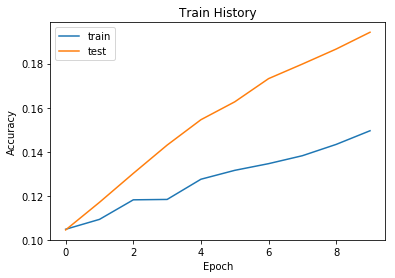

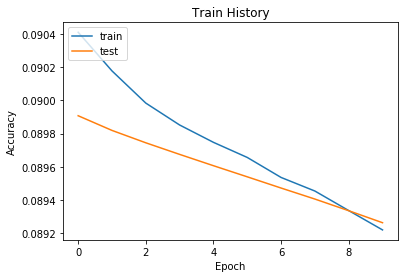

In [37]:
show_train_history('accuracy','val_accuracy')
show_train_history('loss','val_loss')